In [1]:
import pandas as pd

In [4]:
text_data = pd.read_csv("../data/cleaned/sms_spam_data.csv")

In [5]:
text_data.head()

,label,text,cleaned_text
0,ham,"Go until jurong point, crazy.. Available only ...",jurong point crazy available bugis great world...
1,ham,Ok lar... Joking wif u oni...,ok lar joke wif oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win FA Cup final tkts tex...
3,ham,U dun say so early hor... U c already then say...,dun early hor
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think go usf live


In [8]:
text_data.text[2]

"Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"

In [9]:
text_data.shape

(5572, 3)

In [11]:
print("# of texts:", text_data.shape[0])

# of texts: 5572


In [12]:
text_data.label.value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

In [13]:
text_data.label.value_counts(normalize=True)

# we are working with an imbalanced dataset

label
ham     0.865937
spam    0.134063
Name: proportion, dtype: float64

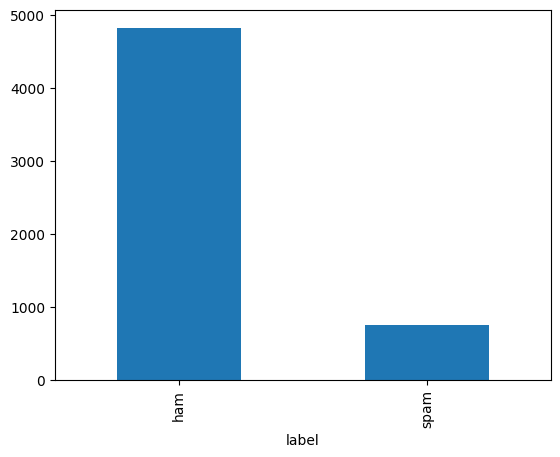

In [16]:
text_data.label.value_counts().plot(kind="bar");

In [18]:
# create new feature - text length

text_data['text_length'] = text_data.text.apply(lambda x:len(x))

In [19]:
text_data.head()

,label,text,cleaned_text,text_length
0,ham,"Go until jurong point, crazy.. Available only ...",jurong point crazy available bugis great world...,111
1,ham,Ok lar... Joking wif u oni...,ok lar joke wif oni,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win FA Cup final tkts tex...,155
3,ham,U dun say so early hor... U c already then say...,dun early hor,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think go usf live,61


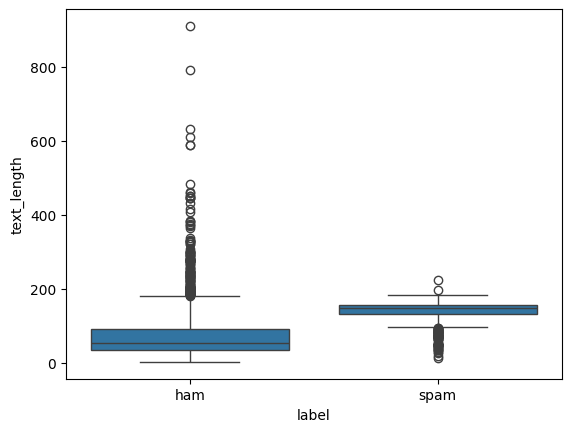

In [21]:
import seaborn as sns

sns.boxplot(x=text_data.label, y=text_data.text_length);

In [23]:
# based on this output, will remove the outliers i.e. all texts above 200 characters

text_data_reduced = text_data[text_data.text_length < 200]

In [24]:
print(text_data.shape)
print(text_data_reduced.shape)

(5572, 4)
(5458, 4)


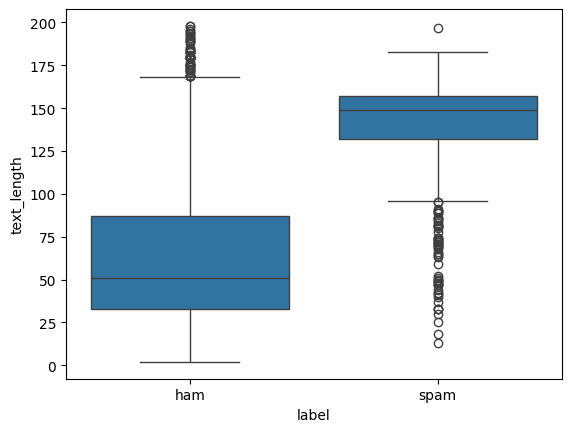

In [25]:
sns.boxplot(x=text_data_reduced.label, y=text_data_reduced.text_length);

# looks like spam texts are longer than non spam texts

In [30]:
# checking for missing data

text_data_reduced.isnull().sum()

label            0
text             0
cleaned_text    24
text_length      0
dtype: int64

In [32]:
text_data_reduced[text_data_reduced.cleaned_text.isnull()]

,label,text,cleaned_text,text_length
74,ham,U can call me now...,NaN,20
804,ham,K I'll be there before 4.,NaN,25
959,ham,Where @,NaN,7
1087,ham,You can never do NOTHING,NaN,24
1190,ham,We're done...,NaN,13
1297,ham,"K so am I, how much for an 8th? Fifty?",NaN,38
1552,ham,U too...,NaN,8
1611,ham,645,NaN,3
2096,ham,I'm done...,NaN,11
2551,ham,I'm done. C Ì_ there.,NaN,21


In [ ]:
# HANDLE the missing data
# option 1 - replace the missing value with a value using fill na

# text_data_reduced.cleaned_text.fillna("X", inplace=True)


In [37]:
# option  2 - drop the rows

print(text_data_reduced.shape)
text_data_reduced = text_data_reduced[~text_data_reduced.cleaned_text.isnull()]
print(text_data_reduced.shape)

(5458, 4)
(5434, 4)


In [41]:
# identify duplicate data

text_data_reduced.duplicated().sum()

391

In [45]:
# identify duplicate data

text_data_reduced[text_data_reduced.duplicated()].sort_values(by='text')

,label,text,cleaned_text,text_length
2123,spam,+123 Congratulations - in this week's competit...,Congratulations week competition draw win priz...,170
2343,ham,1) Go to write msg 2) Put on Dictionary mode 3...,write msg Dictionary mode cover screen hand Pr...,141
2162,ham,1) Go to write msg 2) Put on Dictionary mode 3...,write msg Dictionary mode cover screen hand Pr...,141
2718,spam,18 days to Euro2004 kickoff! U will be kept in...,day Euro kickoff keep inform late news result ...,135
2043,spam,4mths half price Orange line rental & latest c...,mth half price Orange line rental late camera ...,155
...,...,...,...,...
2841,ham,aathi..where are you dear..,aathi dear,27
3469,ham,aathi..where are you dear..,aathi dear,27
2476,ham,i dnt wnt to tlk wid u,dnt wnt tlk wid,22
4002,ham,somewhere out there beneath the pale moon ligh...,beneath pale moon light think dream come true ...,144


In [47]:
print(text_data_reduced.shape)
text_data_reduced = text_data_reduced.drop_duplicates()
print(text_data_reduced.shape)

# for your reference: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html

(5434, 4)
(5043, 4)


In [48]:
text_data_reduced.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5043 entries, 0 to 5571
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   label         5043 non-null   object
 1   text          5043 non-null   object
 2   cleaned_text  5043 non-null   object
 3   text_length   5043 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 197.0+ KB


In [49]:
# encode our label to 1 and 0

text_data_reduced['encoded_label'] = text_data_reduced.label.map({'ham':0, 'spam':1})
text_data_reduced.head()

,label,text,cleaned_text,text_length,encoded_label
0,ham,"Go until jurong point, crazy.. Available only ...",jurong point crazy available bugis great world...,111,0
1,ham,Ok lar... Joking wif u oni...,ok lar joke wif oni,29,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win FA Cup final tkts tex...,155,1
3,ham,U dun say so early hor... U c already then say...,dun early hor,49,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think go usf live,61,0


In [50]:
text_data_reduced.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5043 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   label          5043 non-null   object
 1   text           5043 non-null   object
 2   cleaned_text   5043 non-null   object
 3   text_length    5043 non-null   int64 
 4   encoded_label  5043 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 236.4+ KB


In [51]:
# drop the original label

text_data_reduced.drop(['label'], axis=1, inplace=True)

In [52]:
text_data_reduced.head()

,text,cleaned_text,text_length,encoded_label
0,"Go until jurong point, crazy.. Available only ...",jurong point crazy available bugis great world...,111,0
1,Ok lar... Joking wif u oni...,ok lar joke wif oni,29,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win FA Cup final tkts tex...,155,1
3,U dun say so early hor... U c already then say...,dun early hor,49,0
4,"Nah I don't think he goes to usf, he lives aro...",nah think go usf live,61,0


In [53]:
from sklearn.feature_extraction.text import CountVectorizer

cvec = CountVectorizer()
cvec.fit(text_data_reduced.cleaned_text)

print('-'*50)
print("number of words extracted from cleaned text:", len(cvec.get_feature_names_out()))
print('-'*50)

--------------------------------------------------
number of words extracted from cleaned text: 6577
--------------------------------------------------


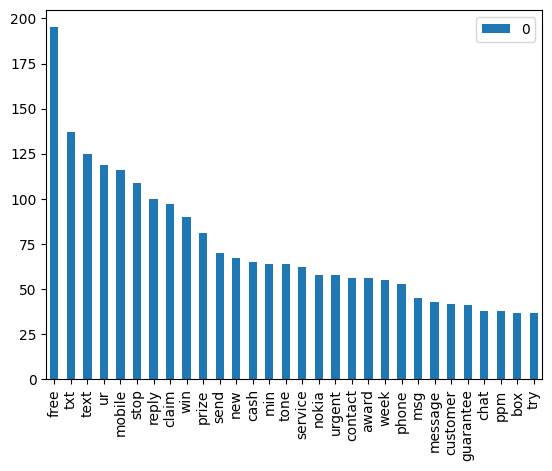

In [59]:
# top appearing words in spam
import numpy as np

cvec = CountVectorizer()
spam_word_counts = cvec.fit_transform(text_data_reduced[text_data_reduced.encoded_label==1].cleaned_text)
cat_tf = np.sum(spam_word_counts, axis=0)

spam_word_count_final = pd.DataFrame(cat_tf,columns=cvec.get_feature_names_out()).transpose()
spam_word_count_final.sort_values(by=[0], ascending=False).head(30).plot(kind="bar");

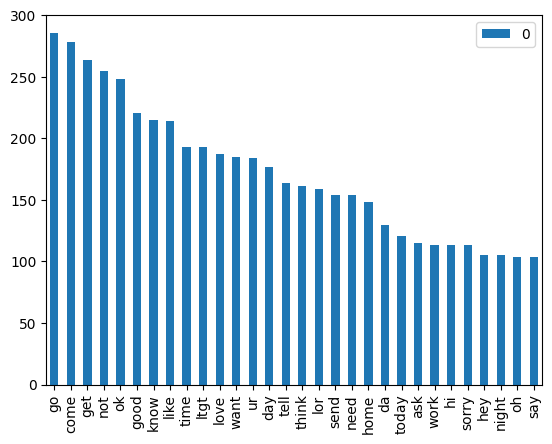

In [60]:
cvec = CountVectorizer()
spam_word_counts = cvec.fit_transform(text_data_reduced[text_data_reduced.encoded_label==0].cleaned_text)
cat_tf = np.sum(spam_word_counts, axis=0)

spam_word_count_final = pd.DataFrame(cat_tf,columns=cvec.get_feature_names_out()).transpose()
spam_word_count_final.sort_values(by=[0], ascending=False).head(30).plot(kind="bar");

In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = list(text_data_reduced['cleaned_text'])
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)

In [55]:
tfidf_df = pd.DataFrame(X.toarray(), columns=list(vectorizer.get_feature_names_out()))

In [61]:
tfidf_df

,aa,aah,aaooright,aathi,ab,abbey,abdoman,abeg,abel,aberdeen,...,zero,zf,zhong,zindgi,zoe,zogtorius,zoom,zouk,zs,zyada
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5039,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5040,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5041,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [71]:
# reset the index before continuing

text_data_preprocessed = pd.concat([text_data_reduced.reset_index(drop=True), tfidf_df], axis=1)

In [72]:
text_data_preprocessed.shape

(5043, 6581)

In [73]:
text_data_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Columns: 6581 entries, text to zyada
dtypes: float64(6577), int64(2), object(2)
memory usage: 253.2+ MB


In [74]:
text_data_preprocessed.head()

,text,cleaned_text,text_length,encoded_label,aa,aah,aaooright,aathi,ab,abbey,...,zero,zf,zhong,zindgi,zoe,zogtorius,zoom,zouk,zs,zyada
0,"Go until jurong point, crazy.. Available only ...",jurong point crazy available bugis great world...,111,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Ok lar... Joking wif u oni...,ok lar joke wif oni,29,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win FA Cup final tkts tex...,155,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,U dun say so early hor... U c already then say...,dun early hor,49,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,"Nah I don't think he goes to usf, he lives aro...",nah think go usf live,61,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [75]:
# drop text and cleaned text

text_data_preprocessed.drop(['text', 'cleaned_text'], axis=1, inplace=True)

In [76]:
text_data_preprocessed.shape

(5043, 6578)

In [77]:
text_data_preprocessed.head()

,text_length,encoded_label,aa,aah,aaooright,aathi,ab,abbey,abdoman,abeg,...,zero,zf,zhong,zindgi,zoe,zogtorius,zoom,zouk,zs,zyada
0,111,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,29,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,155,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,49,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,61,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
text_data_preprocessed.to_csv("../data/cleaned/sms_spam_data_preprocessed.csv")

Summary

- created a new text length column that
- removed 24 rows of data where cleaned text was missing
- removed 391 duplicated rows of data
- encoded the label column and the cleaned text column using tf-idf